# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

!!! здесь и далее буду полагать $A$ симметричной, в противном случае нужно сделать замену  при вычислении градиентов $A \rightarrow \dfrac{A^T+A}{2}$ !!!

Ответ:
1) $ \nabla^2 f(x) = A, f$ - выпукла <=> $A \geq 0$
2) $f$ - сильно выпукла <=> $A > 0$

__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

Ответ:
1) липшицевость градиента: 

$||\nabla f(x_0) - \nabla f(x_1)|| \leq L||x_0-x_1||,$

$\nabla f(x) = Ax - b \rightarrow ||A(x_0-x_1)|| \leq L||x_0-x_1||.$

$L \geq \dfrac{||Ay||}{||y||.}$

Пусть $\lambda_1, \ldots, \lambda_n$ - собственные числа матрицы $A$. Для собственных векторов:

$Ay = \lambda_k y \rightarrow L = \max{\lambda_k}$.

2) сильная выпуклость:

$(y, \nabla^2 f(x) y) \geq \mu ||y||^2$.

$y^TAy \geq \mu y^Ty.$

Для собственного вектора $y: Ay = \lambda_k y \rightarrow y^TAy = \lambda_k y^Ty \geq \mu y^Ty \rightarrow \mu = \min{\lambda_k}.$


## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

__(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

In [29]:
#ответ
import numpy as np
import scipy.linalg as la

# m >= 0, L >= m
def generate(d = 3, m = 1, L = 5):

    # сгенерируем диагональную матрицу по собственным числам
    if d == 1:
        lambdas = [m]
    if d == 2:
        lambdas = [m, L]
    if d > 2:
        lambdas = np.random.uniform(low=m, high=L, size=(d-2,))
        lambdas = lambdas.tolist() + [m, L]

    A = np.diag(lambdas)
    q, _ = la.qr(np.random.rand(d, d))
    A = q.T @ A @ q

    # пусть и b тут будет
    b = np.random.uniform(low=-L/5, high=L/5, size=(d,))
    return A, b

In [30]:
d, m, L = 2, 1, 10
A, b = generate(d, m, L)
print(A, '\n --- \n', b)

[[ 3.48372906 -4.02301523]
 [-4.02301523  7.51627094]] 
 --- 
 [-1.51545777  0.29303495]


__(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

In [31]:
def f(x, A, b):
    return 0.5 * x.T @ A @ x - b.T @ x

def grad(x, A, b):
    return A @ x - b

def gd(gamma=0.01, eps=1e-6, A=np.zeros((d, d)), b=np.zeros((d,))):

    x = np.random.uniform(low=0, high=1, size=(A.shape[0],))
    f_vals = [f(x, A, b)]
    iters = [x]
    k = 0

    # остановка по критерию ||x_k+1 - x_k||^2 < eps
    while 1:
        x0 = x
        x = x0 - gamma * grad(x0, A, b)
        k = k + 1
        f_vals.append(f(x, A, b))
        iters.append(x)
            
        error = np.linalg.norm(x - x0)**2
        if error < eps:
            print("Остановка по критерию ||x^k+1 - x^k||^2 < eps")
            break
        if k > 1e5:
            print("Метод расходится")
            break
    
    x_opt = iters[-1]
    f_opt = f_vals[-1]
    print('Градиентный спуск:')
    print('x = ', x_opt, '\nf(x) = ', f_opt)
    return iters, f_vals

__(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [33]:
#ответ
d, m, L = 10, 1, 100
A,b = generate(d, m, L)

y = np.linalg.solve(A, b)
print("Точное значение:\nx*=", np.round(y, 5), "\nf(x*)=", np.round(f(y, A, b), 5))

x_vals, f_vals = gd(A=A, b=b)

Точное значение:
x*= [ 5.56784  6.95603 -6.53698  0.13654  2.24018  3.14694 -1.90861 -2.77715
  8.22744  1.17377] 
f(x*)= -129.50056
Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 5.53526909  6.90498889 -6.49358498  0.13653334  2.23210084  3.11227518
 -1.901847   -2.75615938  8.17989478  1.16209333] 
f(x) =  -129.4957090096006


__(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 5.5351583   6.9048153  -6.4934374   0.13653332  2.23207337  3.11215727
 -1.90182398 -2.75608798  8.17973306  1.16205363] 
f(x) =  -129.49567596386058


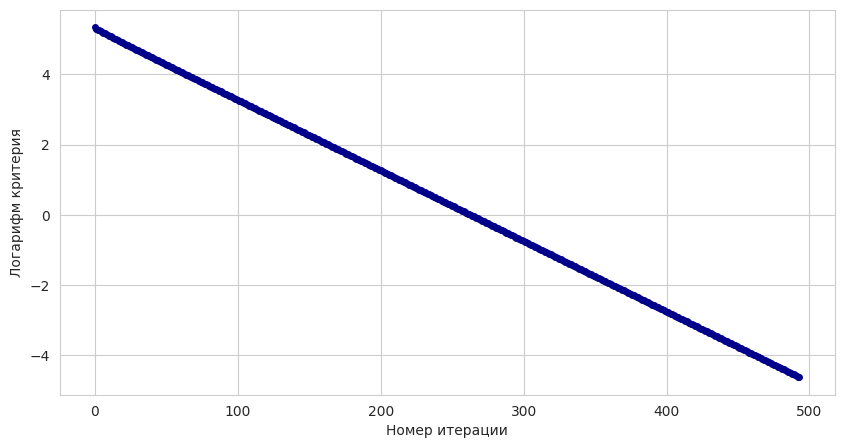

In [35]:
#ответ
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit
import math

plt.figure(figsize=(10, 5))

x_vals, f_vals = gd(A=A, b=b)
err = [np.linalg.norm(x_vals[k] - y)**2 for k in range(len(x_vals))]

n = [i for i in range(len(x_vals))]

plt.plot(n, np.log(err), 'darkblue', marker='o', markersize=4)
plt.xlabel(u'Номер итерации')
plt.ylabel(u'Логарифм критерия')
plt.show()

__(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

Теоретическая зависимость:

$||x^k - x^*||^2 = \dfrac{||x^0 - x^*||^2} {e^{k\mu/L}}$

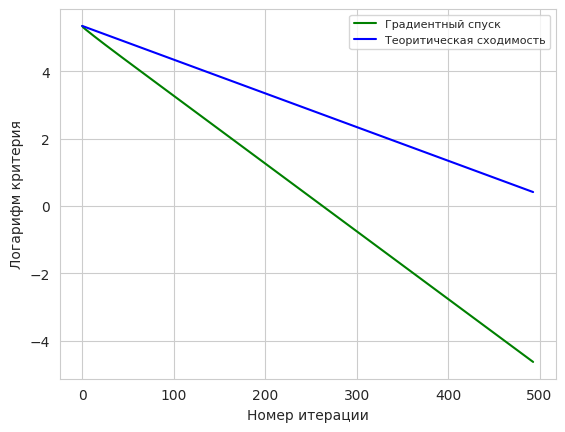

In [36]:
#ответ
x_0 = x_vals[0]
err_th = [np.linalg.norm(x_0 - y)**2 / math.exp(k * m/L) for k in range(len(x_vals))]

plt.xlabel(r"Номер итерации")
plt.ylabel(r"Логарифм критерия")

plt.plot(n, np.log(err), color = 'green', label = r"Градиентный спуск")
plt.plot(n, np.log(err_th), color = 'blue', 
         label = r"Теоритическая сходимость")

plt.legend(fontsize=8)
plt.show()

Метод сходится быстрее теоретической оценки.

__(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 5.53513275  6.90477526 -6.49340336  0.13653332  2.23206704  3.11213008
 -1.90181867 -2.75607151  8.17969575  1.16204448] 
f(x) =  -129.4956683256059
Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 5.50232381  6.85336838 -6.44969932  0.13652881  2.22393298  3.07721336
 -1.89500278 -2.73492559  8.13180308  1.15028802] 
f(x) =  -129.4809379954208
Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 5.23760043  6.43862195 -6.0970866   0.13648513  2.1582813   2.79553625
 -1.83999843 -2.56432415  7.74538349  1.05543631] 
f(x) =  -129.00213296291798
Остановка по критерию ||x^k+1 - x^k||^2 < eps
Градиентный спуск:
x =  [ 4.90666098  5.92065709 -5.65654707  0.13632729  2.07591044  2.44415611
 -1.77110311 -2.35129454  7.2624338   0.93695604] 
f(x) =  -127.50416453764241


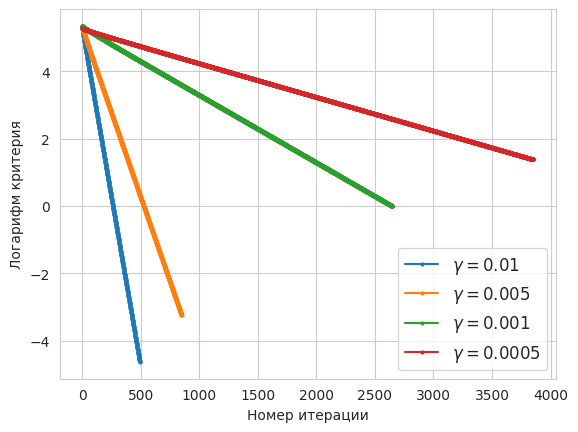

In [37]:
gammas = [0.01, 0.005, 0.001, 0.0005]

sb.set_style("whitegrid")

plt.xlabel(u"Номер итерации")
plt.ylabel(u"Логарифм критерия")

for gamma in gammas:
    x_vals, _ = gd(gamma=gamma, A=A, b=b)
    err = [np.linalg.norm(x_vals[k] - y)**2 for k in range(len(x_vals))]
    xx = np.array(range(1, len(err) + 1))
    plt.plot(xx, np.log(err), marker='o', markersize=2, label = r"$\gamma = $" + str(gamma))

plt.legend(fontsize=12)
plt.show()

__(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

Градиентный спуск не сходится при $\mu = 0$. Покажем это, взяв очень близкое к нулю значение $\mu$ и $L >> \mu$.

Точное значение:
x*= [ 2537.86176   474.77212 -2306.95803   764.86785  1414.67131] 
f(x*)= -7299.39026
Метод расходится
Градиентный спуск:
x =  [ 1604.18696628   300.06140878 -1458.71628089   483.44457013
   894.08086721] 
f(x) =  -6313.390265841719


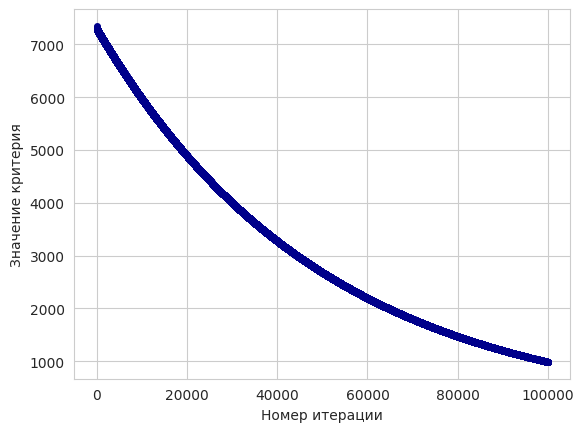

In [41]:
#ответ
d, m, L = 5, 0.001, 100
A1, b1 = generate(d, m, L)

y = np.linalg.solve(A1, b1)
print("Точное значение:\nx*=", np.round(y, 5), "\nf(x*)=", np.round(f(y, A1, b1), 5))

x_vals, f_vals = gd(gamma = 1/L, A=A1, b=b1)

n = [i for i in range(len(x_vals))]
err = [np.linalg.norm(f_vals[k] - f(y, A1, b1)) for k in range(len(x_vals))]

plt.plot(n, err, 'darkblue', marker='o', markersize=4)
plt.xlabel(u'Номер итерации')
plt.ylabel(u'Значение критерия')
plt.show()

Видим, что какая-никакая сходимость наблюдается, но даже при $10^5$ итераций спуска с шагом $\dfrac{1}{L}$ мы все еще очень далеко от оптимума. Не представляется возможным решить эту задачу спуском без модификаций.

__(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

In [45]:
# критерий:|f(x^k) - f(x^*)|, остановка по шагам
def gd2(y, gamma=0.01, steps=1000, A=np.zeros((d, d)), b=np.zeros((d,))):

    x = np.random.uniform(low=-1, high=1, size=(A.shape[0],))
    iters = [x]
    err = [abs(f(x, A, b) - f(y, A, b))]
    
    for k in range(steps):
        x = x - gamma * grad(x, A, b)
        iters.append(x)
        err.append(abs(f(x, A, b) - f(y, A, b)))
    
    x_opt = iters[-1]
    f_opt = f(x_opt, A, b)
    print('Градиентный спуск:')
    print('x = ', x_opt, '\nf(x) = ', f_opt)
    return err

d, m, L = 10, 1, 100
A, b = generate(d, m, L)
y = np.linalg.solve(A, b)

print("Точное значение:\nx*=", np.round(y, 5), "\nf(x*)=", np.round(f(y, A, b), 5))
err = gd2(y, A=A, b=b)

Точное значение:
x*= [-0.81361 -0.87799 -0.78311 -2.61413 -1.34331  0.57109  3.79944 -0.20216
 -0.30608 -1.05942] 
f(x*)= -20.23472
Градиентный спуск:
x =  [-0.81357673 -0.87795536 -0.78309009 -2.61403268 -1.34325972  0.57108322
  3.79929979 -0.2021409  -0.30606811 -1.05938147] 
f(x) =  -20.23471854888965


Градиентный спуск:
x =  [-0.80832405 -0.8719407  -0.77923909 -2.59705346 -1.3352295   0.56942398
  3.77484077 -0.19878583 -0.30421159 -1.05222728] 
f(x) =  -20.234163016174918
Градиентный спуск:
x =  [-0.73733533 -0.79066631 -0.72719067 -2.36757631 -1.22670699  0.54700491
  3.44428105 -0.15344259 -0.27912224 -0.95554109] 
f(x) =  -20.118935269176852
Градиентный спуск:
x =  [-0.31098595 -0.35369116 -0.40157659 -0.95922962 -0.59129201  0.43423192
  1.4494268   0.12019715 -0.13295303 -0.37916702] 
f(x) =  -15.17296411940001
Градиентный спуск:
x =  [-0.07239781  0.09109823 -0.26696509 -0.27766919 -0.16993777  0.28396748
  0.351743    0.26607679 -0.03510999 -0.02977427] 
f(x) =  -9.256064122175442


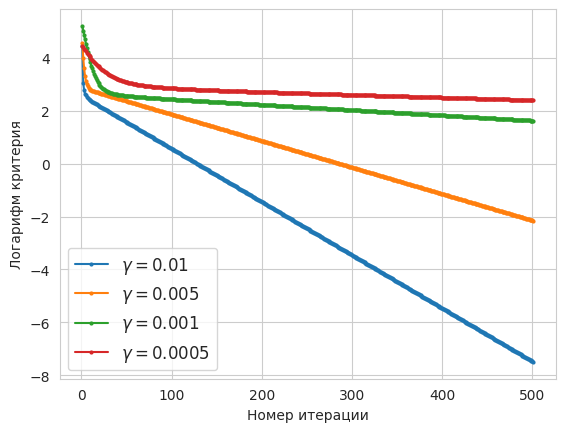

In [48]:
gammas = [0.01, 0.005, 0.001, 0.0005]

sb.set_style("whitegrid")

plt.xlabel(u"Номер итерации")
plt.ylabel(u"Логарифм критерия")

for gamma in gammas:
    err = gd2(y, gamma, steps=500, A=A, b=b)
    xx = np.array(range(1, len(err) + 1))
    plt.plot(xx, np.log(err), marker='o', markersize=2, label = r"$\gamma = $" + str(gamma))

plt.legend(fontsize=12)
plt.show()

Мораль: при слишком малых $\gamma$ метод сходится неприлично долго, при больших $-$ расходится, поэтому стоит брать шаг порядка $\dfrac{1}{L}$ или уменьшать его с номером итерации.

__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

In [161]:
import math

# 1. уменьшающийся шаг
def gamma_lin(k):
    return 1 / (k + 2)

def gamma_quad(k):
    return 1 / (k**2/10 + 2)

def gamma_exp(k):
    return 1 / math.exp(k/10 + 2)

# 2. наискорейший спуск
def gamma_fast(w):
    g = grad(w)
    return (g.T @ g) / (g.T @ A @ g)

# 3. Правило Армихо
def gamma_arm(w, eps=0.8, theta=0.9):
    gamma = 1 / L # start point
    while f(w + gamma * grad(w)) > eps * grad(w).T @ grad(w):
        gamma = gamma * theta
    return gamma

# 4. Шаг Поляка-Шора
def gamma_ps(w, w_opt, alpha=1.5):
    return (f(w) - f(w_opt)) / (alpha * np.linalg.norm(grad(w), ord=2)**2)

In [258]:
def f(w):
    return 0.5 * w.T @ A @ w - b.T @ w

def grad(w):
    return A @ w - b

#  for points 1 and 2
def grad_descent(gamma, iters=1000):

    w = np.random.uniform(low=-1, high=1, size=(d,))
    w_vals, f_vals = [], []

    for k in range(iters):
        w_vals.append(w)
        f_vals.append(f(w))
        if gamma == gamma_fast:
            w = w - gamma_fast(w) * grad(w)
        else:
            w = w - gamma(k) * grad(w)

    return w_vals, f_vals

# Armijo rule
def grad_descent_arm(iters=1000, eps=0.5, theta=0.5):

    w = np.random.uniform(low=-1, high=1, size=(d,))
    w_vals, f_vals = [], []

    for k in range(iters):
        w_vals.append(w)
        f_vals.append(f(w))
        w = w - gamma_arm(w, eps=eps, theta=theta) * grad(w)

    return w_vals, f_vals

# Polyak-Shor step
def grad_descent_ps(iters=1000, alpha=1.2):

    w_opt = np.linalg.solve(A, b)
    w = np.random.uniform(low=-1, high=1, size=(d,))
    w_vals, f_vals = [], []

    for k in range(iters):
        w_vals.append(w)
        f_vals.append(f(w))
        w = w - gamma_ps(w, w_opt, alpha=alpha) * grad(w)

    return w_vals, f_vals

Для начала определим лучший шаг среди gamma_lin, gamma_quad и gamma_exp. Воспользуемся критерием $||\nabla f(x)||^2 < \varepsilon$.

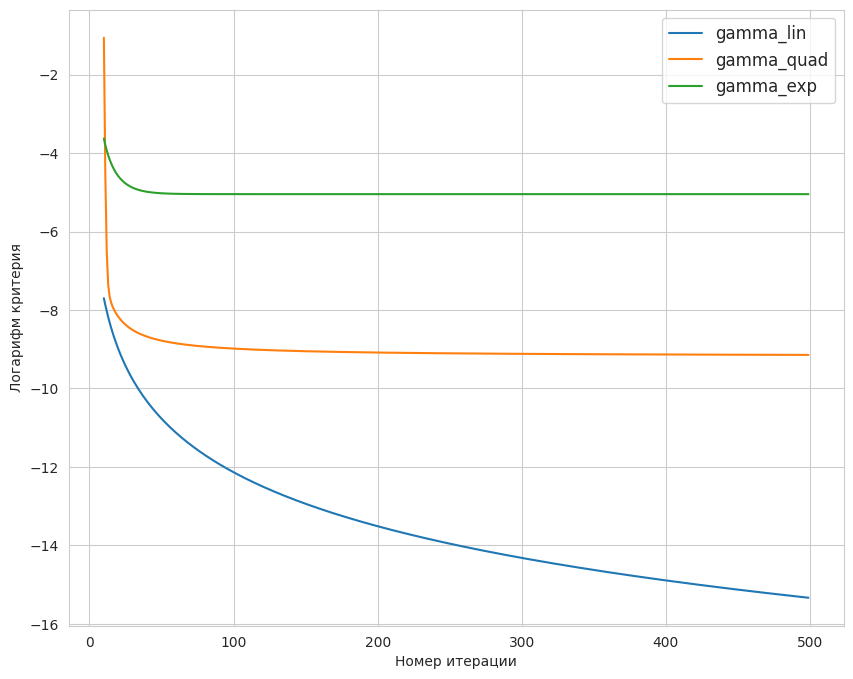

In [149]:
d, m, L = 5, 1, 10
A, b = generate(d, m, L)
gammas = [gamma_lin, gamma_quad, gamma_exp]

plt.figure(figsize=(10, 8))
iters = 500

for gamma in gammas:
    w_wals, _ = grad_descent(gamma=gamma, iters=iters)
    err = [np.linalg.norm(grad(w_wals[k]), ord=2)**2 for k in range(10, iters)]
    n = range(10, iters)
    plt.plot(n, np.log(err), label = str(gamma)[10:-19])

plt.xlabel(u"Номер итерации")
plt.ylabel(u"Логарифм критерия")
plt.legend(fontsize=12)
plt.show()

Ситуация значительно меняется от запуска к запуску и от соотношения констант в определении этих шагов и $L$. Но линейно убывающий шаг показывает самую приличную скорость сходимости, поэтому далее будем работать с ним.

Найдем оптимальные значения гиперпараметров для шага Армихо. Снова воспользуемся критерием $||\nabla f(x)||^2 < \varepsilon$. Начнем с постоянных $\varepsilon$ и различных $\theta$.

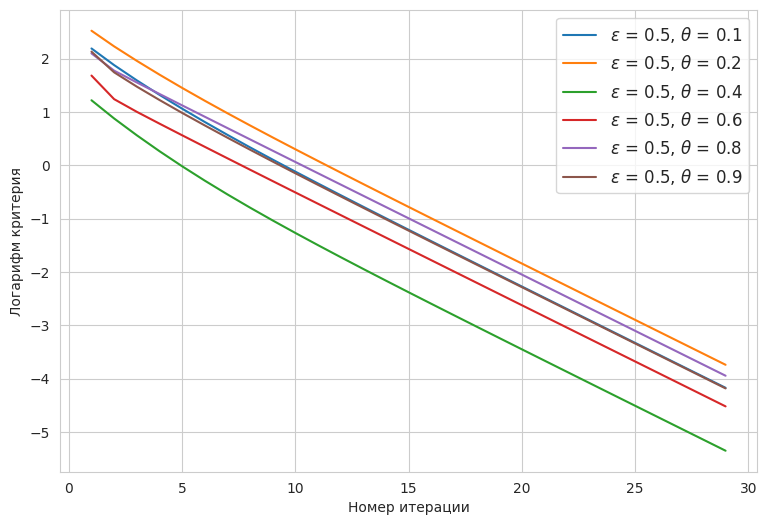

In [241]:
d, m, L = 5, 1, 10
A, b = generate(d, m, L)

epsilons = [0.5] * 6
thetas = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
iters = 30

def arm_parameters(epsilons, thetas, iters):

    plt.figure(figsize=(9, 6))
    for eps, theta in zip(epsilons, thetas):
        w_wals, _ = grad_descent_arm(iters=iters, eps=eps, theta=theta)
        err = [np.linalg.norm(grad(w_wals[k]), ord=2)**2 for k in range(1, iters)]
        n = range(1, iters)
        plt.plot(n, np.log(err), label = r'$\varepsilon$ = ' + str(eps) + ', ' + r'$\theta$ = ' + str(theta))

    plt.xlabel(u"Номер итерации")
    plt.ylabel(u"Логарифм критерия")
    plt.legend(fontsize=12)
    plt.show()

arm_parameters(epsilons=epsilons, thetas=thetas, iters=iters)

Я провел довольно много запусков и явной зависимости скорости сходимости от значения $\theta$ не обнаружил: примерно равновероятно побеждает каждая из $\theta$. Можно лишь сказать, что близкие к 0 и 1 значения оказываются оптимальными значительно реже. Попробуем теперь зафиксировать $\theta = 0.5$ и поварьировать $\varepsilon$.

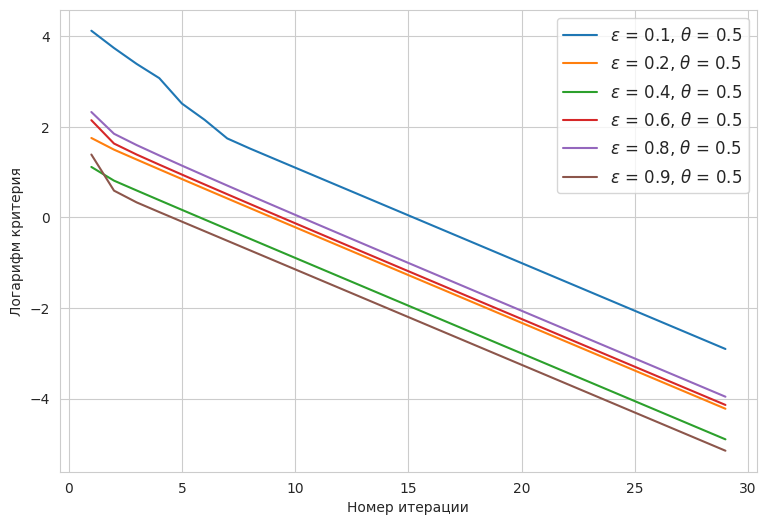

In [257]:
epsilons = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
thetas = [0.5] * 6
iters = 30

arm_parameters(epsilons=epsilons, thetas=thetas, iters=iters)

Ситуация аналогичная, но тут все чуть более однозначно: замечено, что чаще всего побеждают кривые с $\varepsilon = 0.4$ и $\varepsilon = 0.6$. В качестве оптимального значения возьмем $\varepsilon = 0.5$. Про $\theta$ можно сказать следующее: при малом значении этого параметра размер шага может быстро упасть и метод будет сходиться долго, при большом $-$ долго происходит подбор шага.

Возьмем $(\varepsilon^*, \theta^*) = (0.5, 0.5)$.

Далее определим оптимальное значение $\alpha$ для шага Поляка-Шора. Критерий тот же.

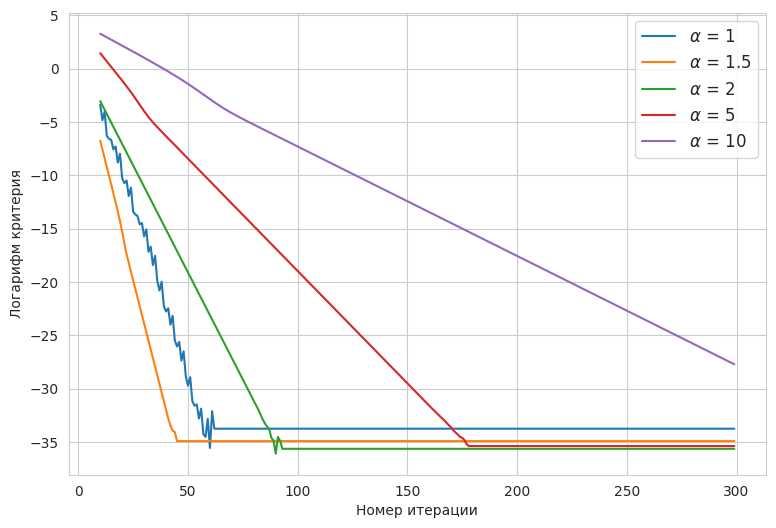

In [175]:
d, m, L = 5, 1, 10
A, b = generate(d, m, L)

alphas = [1, 1.5, 2, 5, 10]
iters = 300

def ps_parameters(alphas, iters):

    plt.figure(figsize=(9, 6))
    for alpha in alphas:
        w_wals, _ = grad_descent_ps(iters=iters, alpha=alpha)
        err = [np.linalg.norm(grad(w_wals[k]), ord=2)**2 for k in range(10, iters)]
        n = range(10, iters)
        plt.plot(n, np.log(err), label = r'$\alpha$ = ' + str(alpha))

    plt.xlabel(u"Номер итерации")
    plt.ylabel(u"Логарифм критерия")
    plt.legend(fontsize=12)
    plt.show()

ps_parameters(alphas=alphas, iters=iters)

Видим, что лучшая скорость сходимости при небольших значениях $\alpha$. Посмотрим внимательнее на промежутке [1; 2].

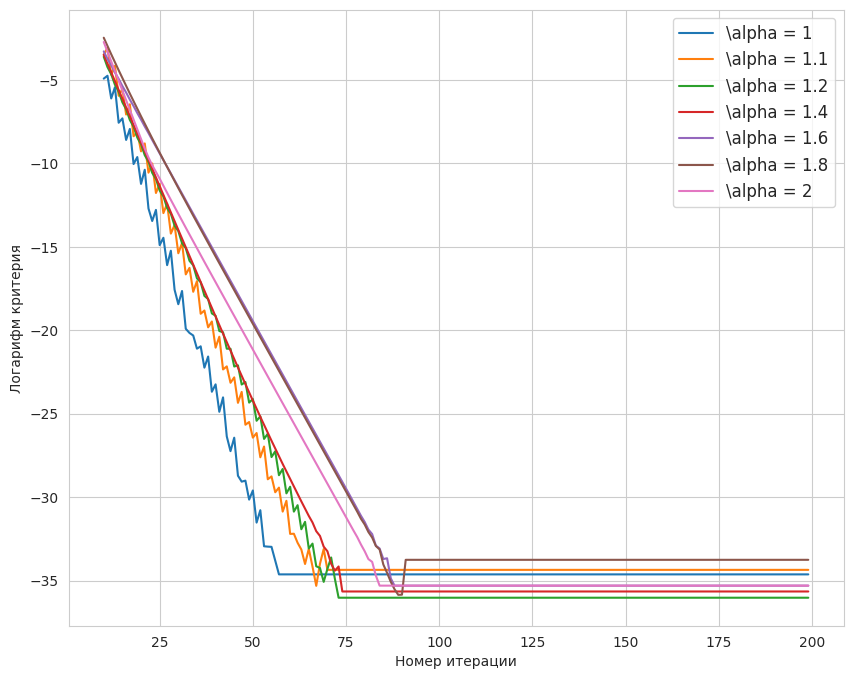

In [159]:
alphas = [1, 1.1, 1.2, 1.4, 1.6, 1.8, 2]
iters = 200
ps_parameters(alphas=alphas, iters=iters)

Сходимость при этих значениях $\alpha$ примерно одинакова. В качестве оптимального параметра выберу $\alpha = 1.2$, поскольку при этом значении получилось достичь наименьшего значения критерия.

Теперь сравним все приведенные выше техники подбора шага. Начнем с сильно выпуклого случая.

In [287]:
d, m, L = 5, 1, 10
A, b = generate(d, m, L)
iters = 500

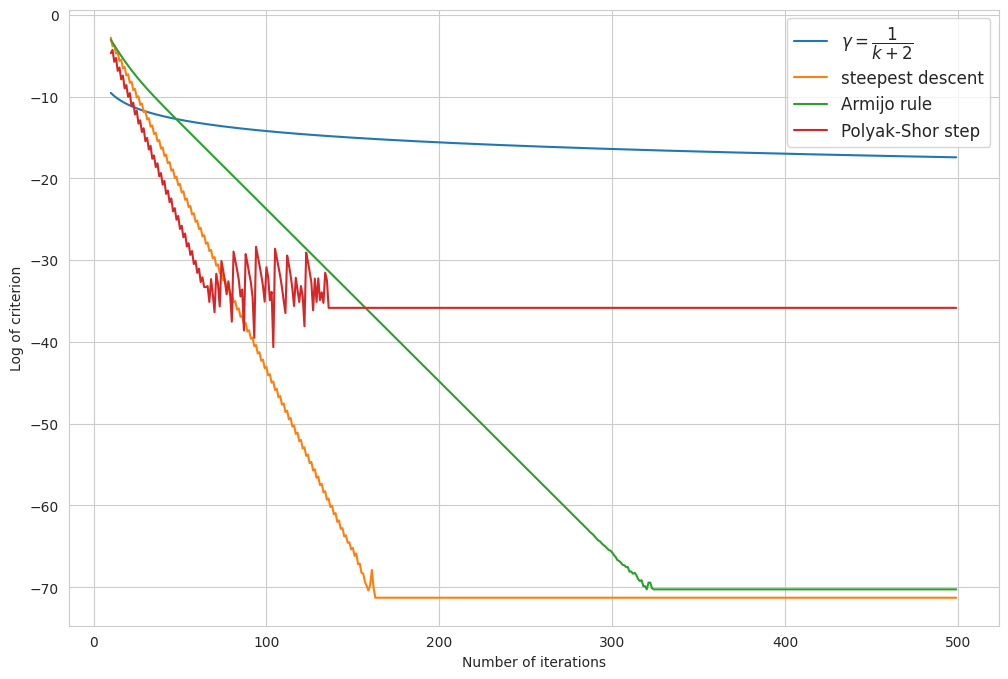

In [288]:
def compare_methods(start=10, ps=True):
    plt.figure(figsize=(12, 8))
    n = range(start, iters)

    w1,_ = grad_descent(gamma=gamma_lin, iters=iters)
    w2,_ = grad_descent(gamma=gamma_fast, iters=iters)
    w3,_ = grad_descent_arm(iters=iters, eps=0.5, theta=0.5)
    w4,_ = grad_descent_ps(iters=iters, alpha=1.2)

    err1 = [np.linalg.norm(grad(w1[k]), ord=2)**2 for k in n]
    err2 = [np.linalg.norm(grad(w2[k]), ord=2)**2 for k in n]
    err3 = [np.linalg.norm(grad(w3[k]), ord=2)**2 for k in n]
    err4 = [np.linalg.norm(grad(w4[k]), ord=2)**2 for k in n]

    plt.plot(n, np.log(err1), label = r'$\gamma = \dfrac{1}{k + 2}$')
    plt.plot(n, np.log(err2), label = r'steepest descent')
    plt.plot(n, np.log(err3), label = r'Armijo rule')
    if ps:
        plt.plot(n, np.log(err4), label = r'Polyak-Shor step')

    plt.xlabel(u"Number of iterations")   
    plt.ylabel(u"Log of criterion")
    plt.legend(fontsize=12)
    plt.show()

compare_methods()

Наискорейший спуск действительно оказался наискорейшим. Правило Армихо тоже показало себя очень достойно. 

Сравним их в выпуклом случае ($\mu = 0$).

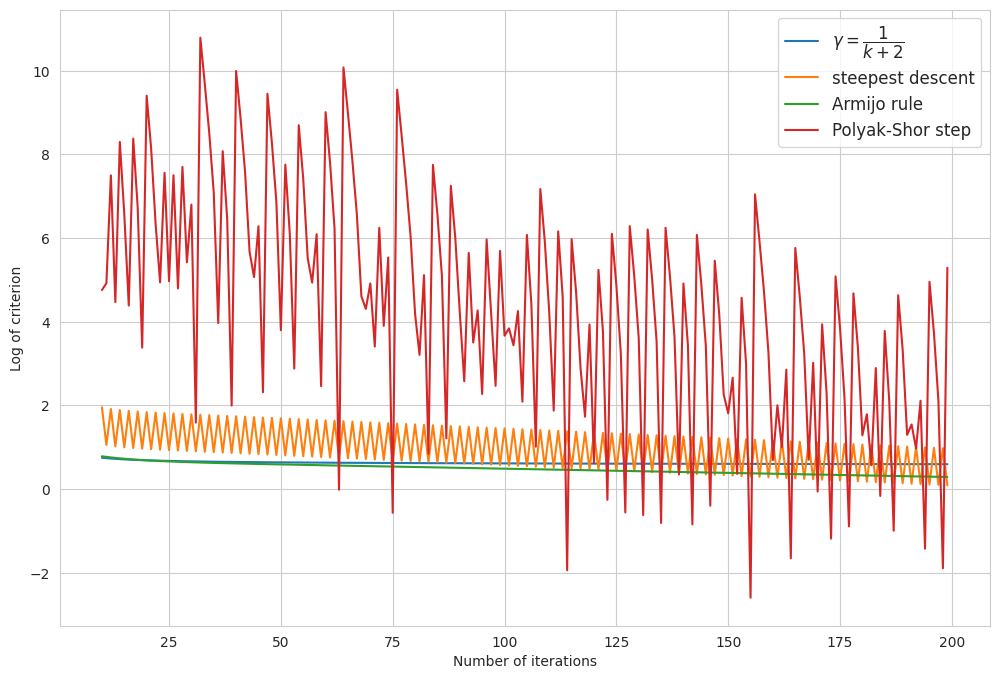

In [291]:
d, m, L = 5, 0.01, 10
A, b = generate(d, m, L)
iters = 200
compare_methods()

Как видим, шаг Поляка-Шора не переваривает выпуклые задачи. Посмотрим внимательнее на другие методы.

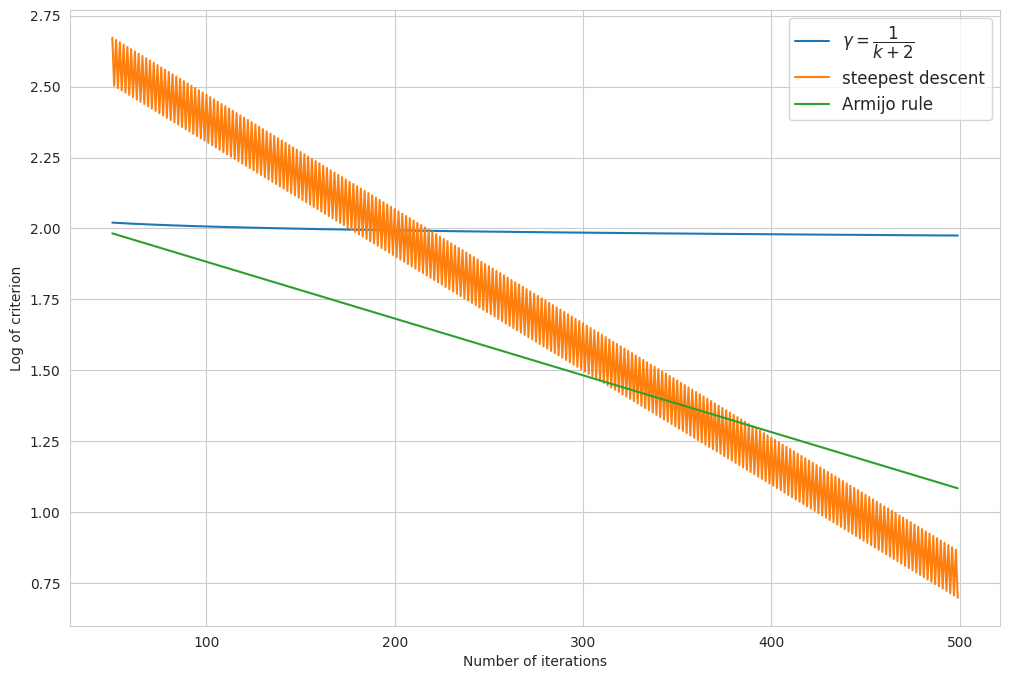

In [303]:
d, m, L = 5, 0.01, 10
A, b = generate(d, m, L)
iters = 500

compare_methods(start=50, ps=False)

Метод с использованием правила Армихо все еще сходится, но значительно дольше. Наискорейший спуск снова победил, хоть и сходится он немонотонно.